Da qua in poi consideriamo una distribuzione di Landau

In [1]:
import numpy
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as mplcm

from plot_config import *

13.004800000000003
9.7536


In [2]:
NUM_COLORS = 11
cm = plt.get_cmap("tab10")
cNorm = colors.Normalize(vmin=0, vmax=NUM_COLORS - 1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)

markers = ["o", "v", "^", ">", "<", "s", "P", "X", "D", "d", "o"]

In [3]:
massimi2=list()
path_dir='20240502_muons_bias_42V_trig_m10mV_box_indoor'
count2=0
for files in os.listdir(path_dir):
    if os.path.isfile(os.path.join(path_dir, files)):
        count2+=1

print(count2)

for i in numpy.arange(0, count2, 1):
    nome_file=f'C1coil20may{i:05}.txt'
    file_path = os.path.join(path_dir, nome_file)
    dataset = pd.read_csv(file_path, skiprows=4, delimiter='\t', engine='python')
    massimi2.append(max(-dataset.iloc[:,1])*1000)

2164


In [ ]:
massimi2=list()
path_dir='20240502_muons_bias_42V_trig_m10mV_box_indoor'
count2=0
for files in os.listdir(path_dir):
    if os.path.isfile(os.path.join(path_dir, files)):
        count2+=1

print(count2)

for i in numpy.arange(0, count2, 1):
    nome_file=f'C1coil20may{i:05}.txt'
    file_path = os.path.join(path_dir, nome_file)
    dataset = pd.read_csv(file_path, skiprows=4, delimiter='\t', engine='python')
    massimi2.append(max(-dataset.iloc[:,1])*1000)

2164


In [ ]:
massimi4=list()
path_dir='analisi_muoni\da_tenere.txt'
count4=0
with open("esempio.txt", "r") as file:
    for nome_file in file:
        count4+=0
        file_path = os.path.join(path_dir, nome_file)
        dataset = pd.read_csv(file_path, skiprows=4, delimiter='\t', engine='python')
        massimi4.append(max(-dataset.iloc[:,1])*1000)

2164


In [4]:
def landau(x, mu, c):
    return numpy.exp(-0.5 * ((x - mu) / c + numpy.exp(-(x - mu) / c)))

<Figure size 512x384 with 0 Axes>

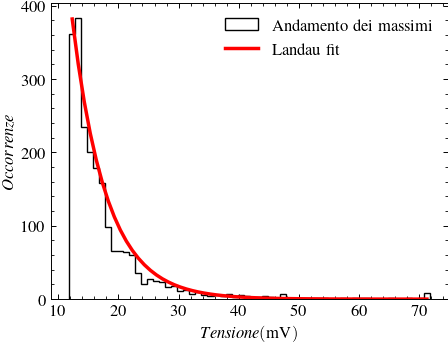

In [5]:
bin_edges=numpy.arange(min(massimi2), max(massimi2)+1, 1)

hist_values, bins, _ = plt.hist(massimi2, bins=bin_edges, histtype='step', edgecolor='black')

mu, c = numpy.mean(massimi2)-4, numpy.std(massimi2)/4.5

mu, c = numpy.mean(massimi2)-30, numpy.std(massimi2)/2.7

bin_centers = 0.5 * (bins[1:] + bins[:-1])

landau_values = landau(bin_centers, mu, c)

scaling_factor = numpy.sum(hist_values) / numpy.sum(landau_values)
landau_values *= scaling_factor*1.1

plt.clf()
fig, ax1=plt.subplots()
ax1.hist(massimi2, bins=bin_edges, edgecolor="black", histtype="step", label="Andamento dei massimi")
ax1.plot(bin_centers, landau_values, color="red", linewidth=2.5, label='Landau fit')

plt.legend(loc="upper right")
ax1.set_ylabel(r"$Occorrenze$")
ax1.set_xlabel(r"$Tensione (\si{\milli\volt})$")


plt.show()



2164.0
2813.1999999999994
503.33908832897185


<Figure size 512x384 with 0 Axes>

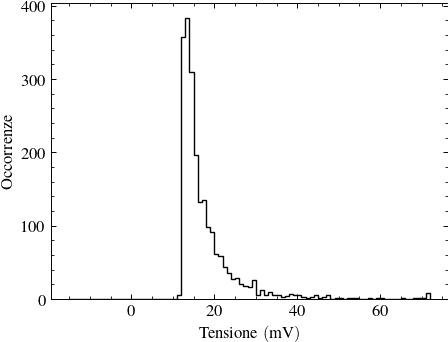

In [13]:
bin_edges=numpy.arange(-15, max(massimi2)+1, 1)

hist_values, bins, _ = plt.hist(massimi2, bins=bin_edges, histtype='step', edgecolor='black')


print(numpy.sum(hist_values))
print(numpy.sum(landau_values))

print(scaling_factor)

plt.clf()
fig, ax1=plt.subplots()
ax1.hist(massimi2, bins=bin_edges, edgecolor="black", histtype="step", label="Andamento dei massimi")

ax1.set_ylabel(r"Occorrenze")
ax1.set_xlabel(r"Tensione $(\si{\milli\volt})$")


save_path = r"C:\Users\giorg\OneDrive\Documenti\GIORGIO\SCUOLA\UNIVERSITA\TESI TRIENNALE\tesi_Giorgio_Venezia\img"
filename = r"istogramma_minimi.pdf"
full_save_path = os.path.join(save_path, filename)
plt.savefig(full_save_path)

plt.show()

2164.0
4.299288591283924
503.33908832897185


<Figure size 512x384 with 0 Axes>

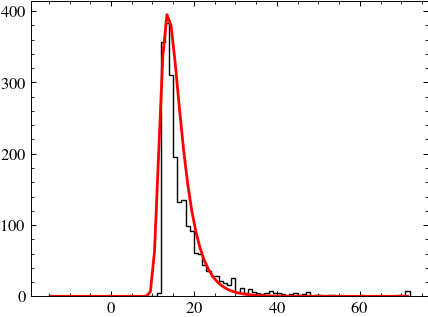

In [6]:
bin_edges=numpy.arange(-15, max(massimi2)+1, 1)

hist_values, bins, _ = plt.hist(massimi2, bins=bin_edges, histtype='step', edgecolor='black')

mu, c = numpy.mean(massimi2)-4, numpy.std(massimi2)/4.5

bin_centers = 0.5 * (bins[1:] + bins[:-1])

landau_values = landau(bin_centers, mu, c)

scaling_factor = (numpy.sum(hist_values) / numpy.sum(landau_values))

print(numpy.sum(hist_values))
print(numpy.sum(landau_values))

print(scaling_factor)

landau_values *= scaling_factor*1.3

plt.clf()
fig, ax1=plt.subplots()
ax1.hist(massimi2, bins=bin_edges, edgecolor="black", histtype="step", label="Andamento dei massimi")
ax1.plot(bin_centers, landau_values, color="red", linewidth=2, label='Landau fit')

save_path = r"C:\Users\giorg\OneDrive\Documenti\GIORGIO\SCUOLA\UNIVERSITA\TESI TRIENNALE\tesi_Giorgio_Venezia\img"
filename = r"muons_landau_fit_estesa.pdf"
full_save_path = os.path.join(save_path, filename)
plt.savefig(r"muons_landau_fit_estesa.pdf")

plt.show()

In [7]:
#calcolo MPV
indice_mpv=numpy.argmax(landau_values)
print(indice_mpv)
MPV=bin_centers[indice_mpv]
print(MPV)

28
13.5


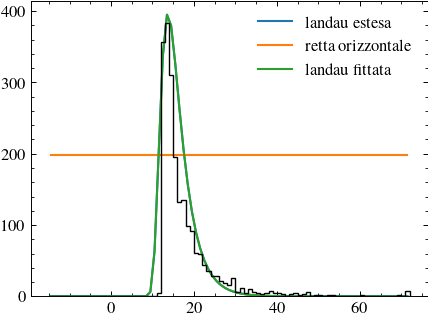

In [8]:
#calcolo sigma
quota=max(landau_values)/2

def retta_or(x, y):
    funzione=list()
    for i in x:
        funzione.append(y)
    return funzione

fig, ax1=plt.subplots()
ax1.plot(bin_centers, landau_values, label="landau estesa")
quota_f=retta_or(bin_centers, quota)

ax1.plot(bin_centers, quota_f, label="retta orizzontale")
ax1.plot(bin_centers, landau_values, label="landau fittata")
ax1.hist(massimi2, bins=bin_edges, histtype='step', edgecolor='black')
plt.legend(loc="upper right")
plt.show()


In [9]:

x_guess=[mu-c, mu+c]

landau_interp=interp1d(bin_centers, landau_values-quota_f)

intersezioni=fsolve(landau_interp, x_guess)

print(intersezioni)

sigma=intersezioni[1]-intersezioni[0]
print(sigma)

[11.47391882 17.67245239]
6.198533567797199


<Figure size 512x384 with 0 Axes>

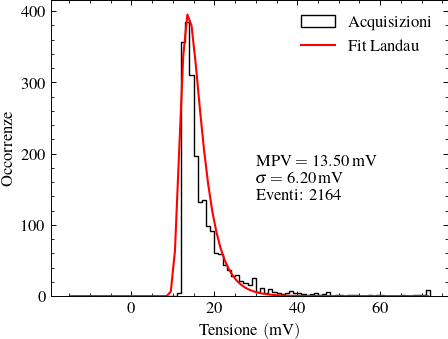

In [10]:

plt.clf()
fig, ax1=plt.subplots()
ax1.hist(massimi2, bins=bin_edges, edgecolor="black", histtype="step", label="Acquisizioni")
ax1.plot(bin_centers, landau_values, color="red", linewidth=1.5, label='Fit Landau')

plt.legend(loc="upper right")
ax1.set_ylabel(r"Occorrenze")
ax1.set_xlabel(r"Tensione $(\si{\milli\volt})$")

ax1.text(
    30,
    200,
    "\n".join((r"$\text{MPV}=\SI{%.2f}{\milli\volt}$"%MPV, r"$\sigma=\SI{%.2f}{\milli\volt}$"%sigma, r"Eventi: $%.0f$"%count2)),
    fontsize=12,
    color="black",
    verticalalignment="top",
)

save_path = r"C:\Users\giorg\OneDrive\Documenti\GIORGIO\SCUOLA\UNIVERSITA\TESI TRIENNALE\tesi_Giorgio_Venezia\img"
filename = r"muons_landau_fit.pdf"
full_save_path = os.path.join(save_path, filename)
plt.savefig(r"muons_landau_fit.pdf")

plt.show()


Con i dati filtrati